# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. 

Due to this rapid growth, many new companies have emerged in this industry and use digital marketing to reach out to their audience with their offerings. Below are the sources for interacting and obtaining Leads (customer who show interest) after which representative connects with the lead on call or through email to share further details.

* Social media or other online platforms. 
* Website/app and downloads the brochure
* Emails for more information.

## Goal
ExtraaLearn is a new company in the EDTech industry faced with large number of Leads. The goal is to develope a Machine Learning model to identify leads that are more likely to convert for resources allocation.

### Specific Objectives

* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process,
* Create a profile of the leads which are likely to convert.

**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset

df = pd.read_csv('ExtraaLearn.csv')

df.head(6)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.682,Phone Activity,No,No,No,Yes,No,0


## Data Overview

- Observations
- Sanity checks

In [3]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

- There are **4612 observations and 15 columns** in the dataset.
- All the columns have 4612 non-null values, i.e., **there are no missing values in the data.**

**Let's check the unique values in each column** 

In [4]:
# Checking unique values in each column
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observations:**

- **ID** is unique for each employee and **can be dropped**. It will add no value to  analysis.
- The outcome variable **status** is coded 0 and 1.
- Based on the unique values we can identify categorical and continuous variables
- Let's drop the ID variable and define lists of numerical and categorical variables for exploration

In [5]:
# Dropping the ID columns 
df=df.drop(['ID'],axis=1)

## Exploratory Data Analysis (EDA)

In [6]:
# Creating numerical columns
num_cols=['age', 'website_visits','time_spent_on_website', 'page_views_per_visit']

# Creating categorical variables 
cat_cols= ['current_occupation', 'first_interaction','profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels','referral', 'status']

In [7]:
# Checking summary statistics of numerical variables
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


**Observations:**

- **Average lead age is ~46 years** and distrubuted accross a wide range (18-63 years).
- **50% of the leads visited website 3 times** while **75%  visited 5 times**. A few visited many times as high as **30 times*.
- **The average time spent on website is 724 mins.** with an **IQR of 0-2537mins** indicating while some leads have not explored the platform at all, others explore many times.

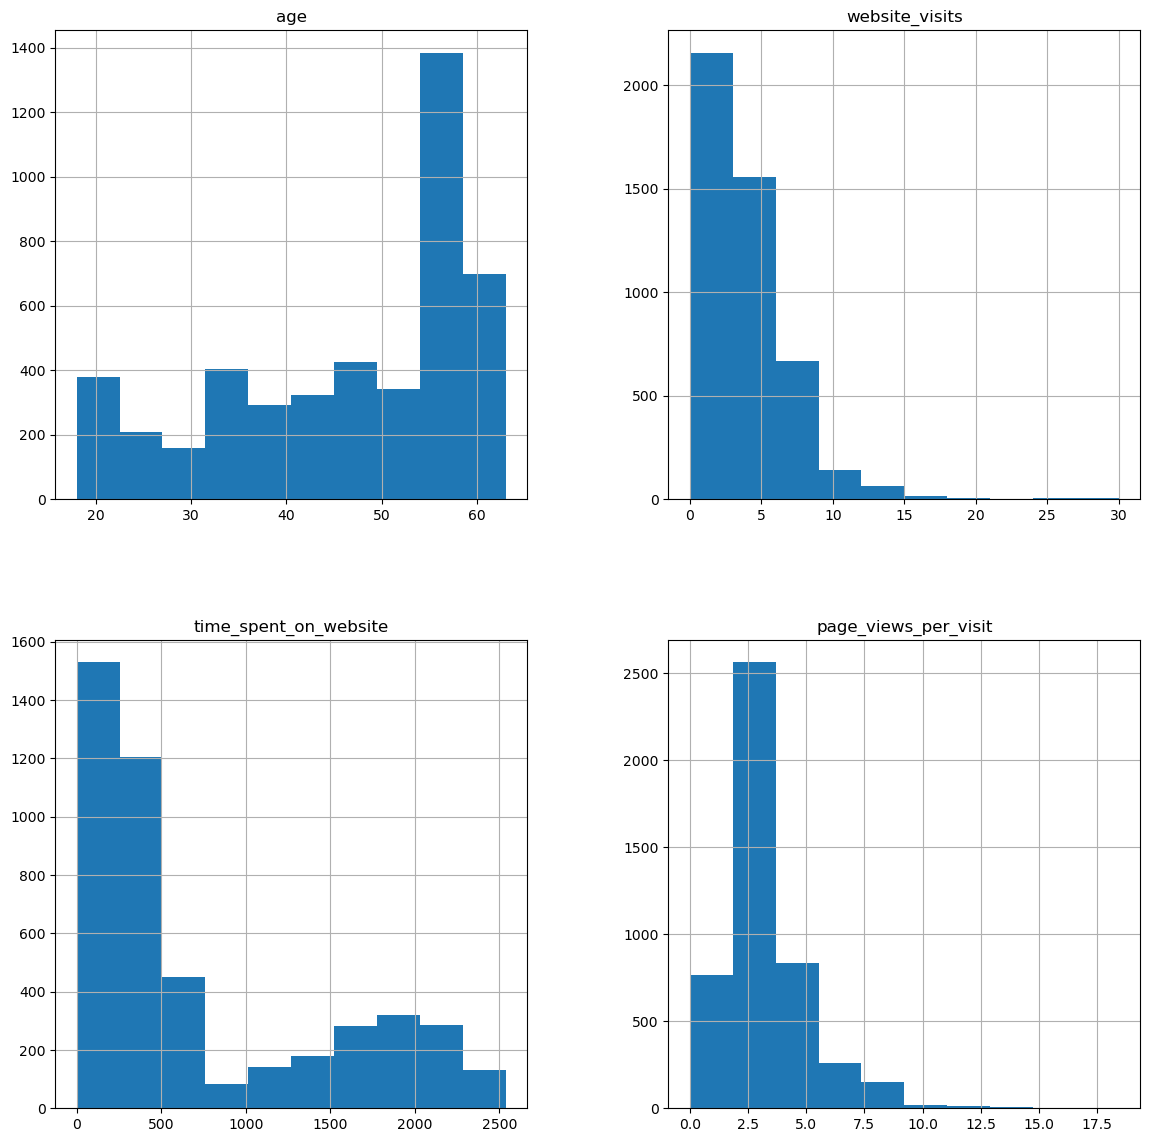

In [8]:
# Creating histograms for numerical variables
df[num_cols].hist(figsize=(14,14))
plt.show()

**Observations:**

- The age distribution slightly skewed to the left (median > mean). The third quatile is also slightly lower than the maximum age (suggestive of skewness). The highest proportion of leads are in the age range of 56-57 years.

- **The number of website visits** is skewed to the right meaning that most of the leads explore the website for **<5 times** although some visited as high as **30 times**.

- The time spent follows a bi-modal distribution with the highest proportion spending **less time (<500 mins)** and also another second highest proportion spending **more time (>1500 mins)** on the website.

- The **number of web pages visited** is normally distributed (mean almost equal median) with the highest proportion visiting 3 pages on the average

In [9]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
******

**Observations:**

- **The proportion of converted Leads is 70%.**
- **The highest proportion of the leads are professionals followed by the unemployed.** 
- Small proportion **(5%) of Leads** first saw the company ad on Newspapers as compared to the **11% who explored their digital marketing platforms**. 
- 55% of the leads first interacted with the program via the website as expected probably
- Very few (2%) were introduced by direct referral.

**Univariate Analysis**
- Diagramatic association between the Outcome **Status** and each categorical predictors

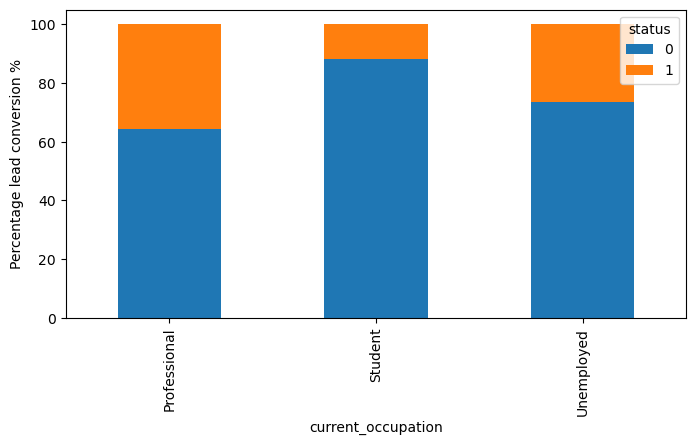

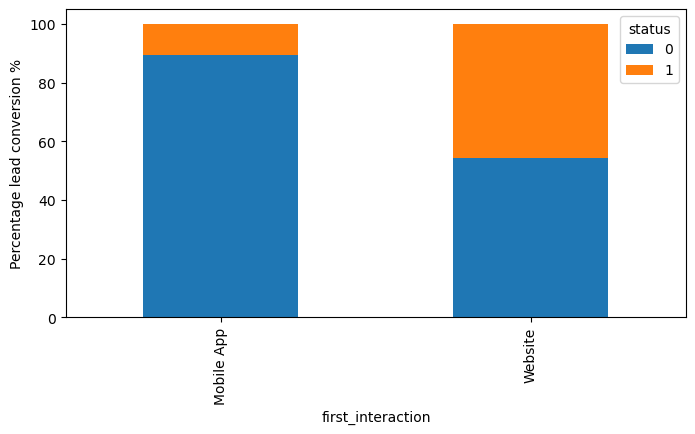

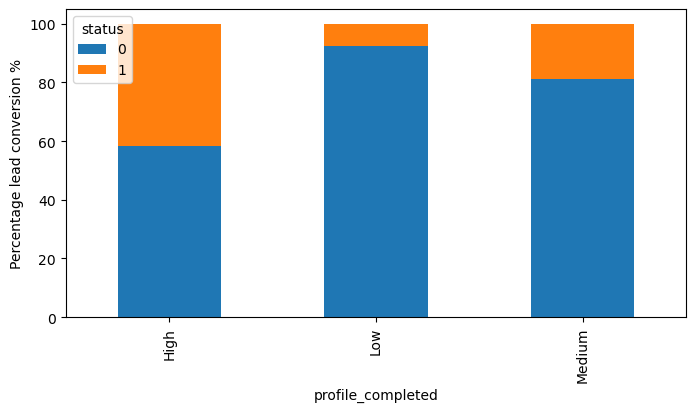

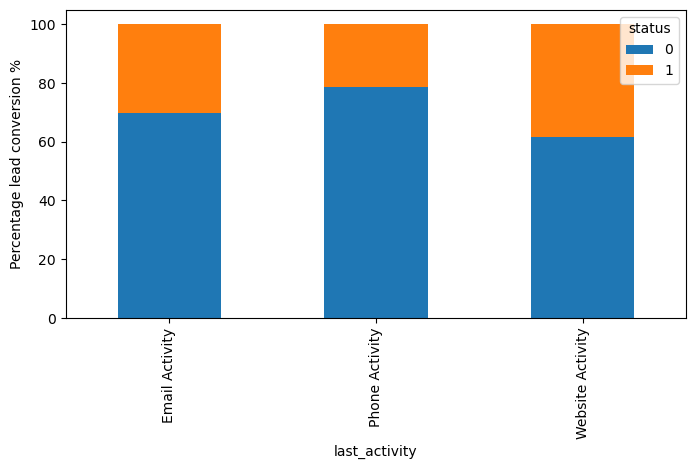

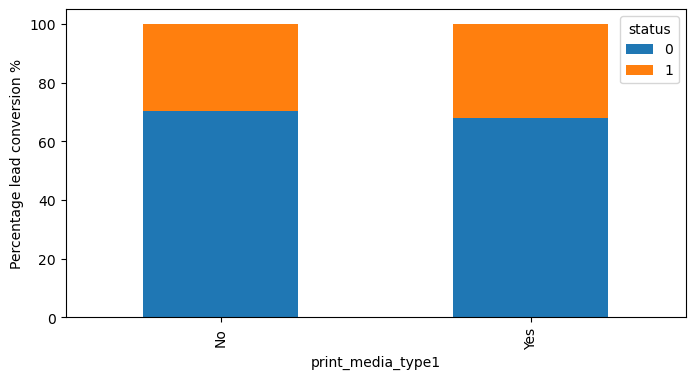

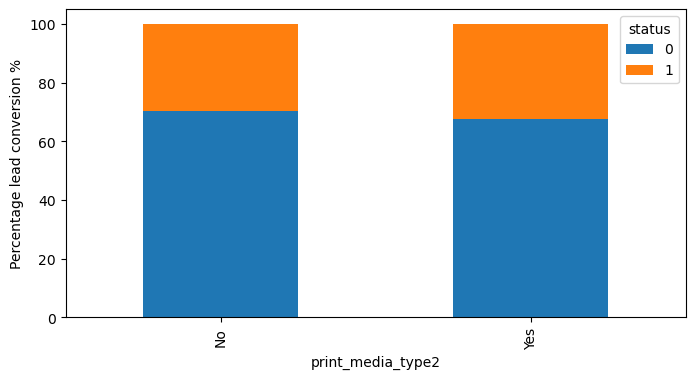

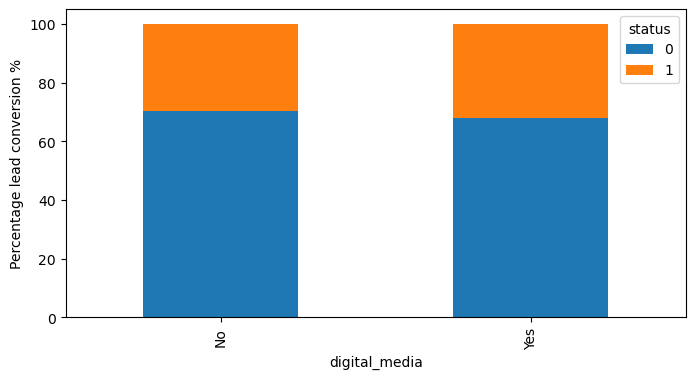

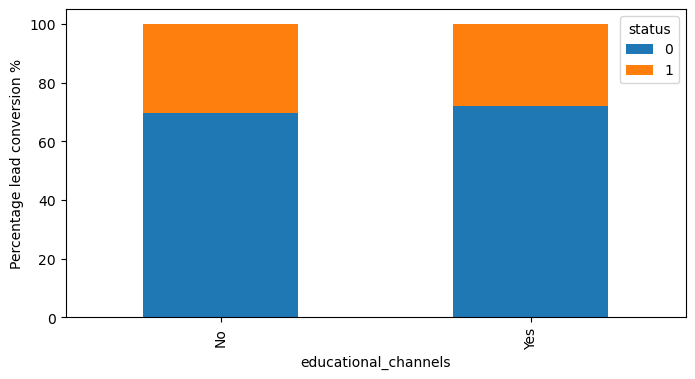

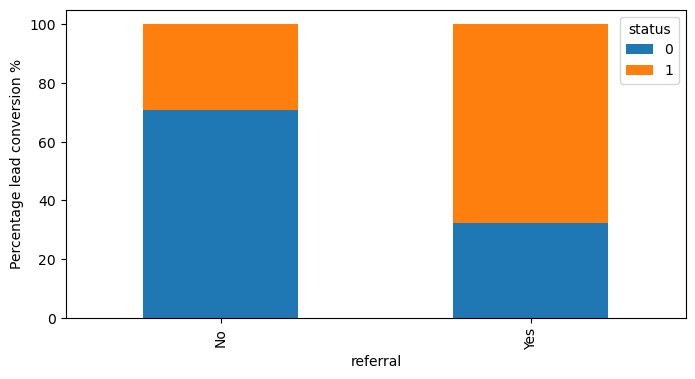

In [10]:
#The nomalize is used to convert the 
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage lead conversion %') 

**Observations:**

- The proportion of Leads (PoL) who converted is highest among the professionals followed by the unemployed.
- The PoL is highest (40%) among Leads who interacted with the Website for the first time compared to the mobile apps (10%). 
- The PoL is highest (40%) among Leads who interacted with the ExtraLear rep via webiste followed by email activity (30%)
- The PoL is disproportionately higher (70%) amongs Leads directly referred as conmpared to other channels (30%)
- Although the proportion of those who saw the adds differs across different platforms, the conversion rate seem to be insignificantly different.
- The PoL seem to be directly proportional to the profile completion ranging from high (40%) to medium (20%) to low (10%)


In [11]:
# Mean of numerical variables grouped by attrition
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


**Observations:**

- The average time spent on the webiste by those who converted is higher (1068 mins) than that of those who do not convert (577 mins).
- There is no significant different in the age, number of website visits and the number of pages viewed per visit among between Leads who convert and those who do not.

## **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

### Data Preprocessing

- Check for Multicollinearity
- Feature engineering (creating dummy variables and scaling data)
- Preparing data for modeling (separating the independent and the dependent variables)

<AxesSubplot:>

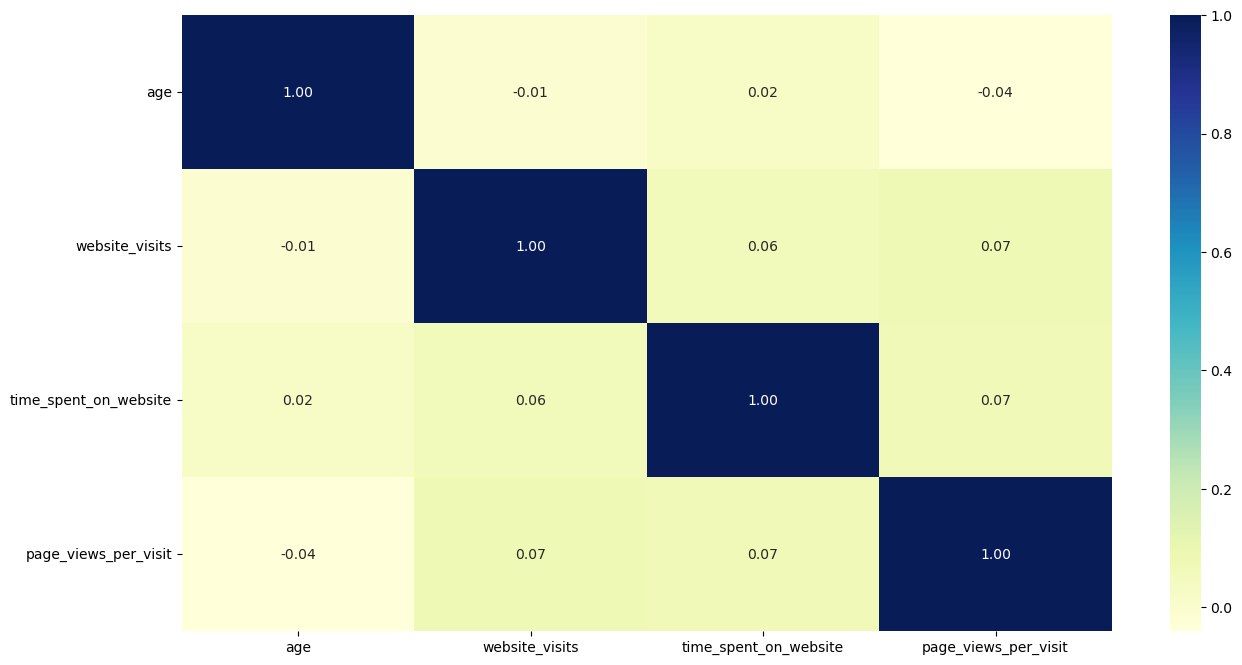

In [12]:
# Plotting the correlation between numerical variables to avoid multicollinearity and overfitting
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- The numerical variables are not correlated. The correlation coefficients are very low

In [13]:
# Creating list of dummy columns/one-hot encoding to cater for any nominal variables
to_get_dummies_for = ['current_occupation', 'first_interaction','profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels','referral']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      


In [14]:
# Separating the dependent and the independent variables

Y= df.status
X= df.drop(columns = ['status'])

**Splitting the data into 70% train and 30% test set**

Each class of the outcome is adequately represented, otherwise, we would execute stratified sampling before splitting for adequate representation of both classes of the outcome variable.

In [15]:
# Splitting the data to check for checking overfitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

### **Scaling the data**
- I scaled the data across the a mean of 0 and stabdard deviation of 1. This is to allow equal weightage to all features with different magnitude.

In [16]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3228 entries, 389 to 2455
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3228 non-null   int64  
 1   website_visits                  3228 non-null   int64  
 2   time_spent_on_website           3228 non-null   int64  
 3   page_views_per_visit            3228 non-null   float64
 4   current_occupation_Student      3228 non-null   uint8  
 5   current_occupation_Unemployed   3228 non-null   uint8  
 6   first_interaction_Website       3228 non-null   uint8  
 7   profile_completed_Low           3228 non-null   uint8  
 8   profile_completed_Medium        3228 non-null   uint8  
 9   last_activity_Phone Activity    3228 non-null   uint8  
 10  last_activity_Website Activity  3228 non-null   uint8  
 11  print_media_type1_Yes           3228 non-null   uint8  
 12  print_media_type2_Yes           

In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 2362 to 1810
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             1384 non-null   int64  
 1   website_visits                  1384 non-null   int64  
 2   time_spent_on_website           1384 non-null   int64  
 3   page_views_per_visit            1384 non-null   float64
 4   current_occupation_Student      1384 non-null   uint8  
 5   current_occupation_Unemployed   1384 non-null   uint8  
 6   first_interaction_Website       1384 non-null   uint8  
 7   profile_completed_Low           1384 non-null   uint8  
 8   profile_completed_Medium        1384 non-null   uint8  
 9   last_activity_Phone Activity    1384 non-null   uint8  
 10  last_activity_Website Activity  1384 non-null   uint8  
 11  print_media_type1_Yes           1384 non-null   uint8  
 12  print_media_type2_Yes          

**Observations:**

- The train data now has 3228 observations while the test data has 1384 observations both still retaining the 16 variables

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**
1. Predict a Lead will convert when the Lead does not (false positive).
2. Predict a Lead will not convert when they actually did (false negative).

We will use the below components of the confusion Matrix to evaluate our model selection.

**Recall**
- This is the proportion of the predicted enrolment out of the true enrolments.

**Precision**
- This is the proportion of true enrollment out of the predicted enrollments.

**Accuracy**
- This is the proportion of all the correctly predicted enrolments and non enrolments.

Recall in this context is more important as the higher the recall, the better knowing the number of Leads that will convert and thus assist ExtraaLearn with proper planning and allocation of their limited resources.


**The code below is for creating a function to calculate and print the classification report and confusion matrix for each model to avoid code repitition for each model.**

In [19]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not enrolled', 'Enrolled'], yticklabels=['Not enrolled', 'Enrolled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

I will build 3 different models:

- **Logistic Regression**
- **Decision Tree**
- **Random Forest**

#### Logistic Regression model

- Logistic Regression is a supervised learning algorithm used for **binary classification problems** i.e. where the outcome variables have 2 possible values (0 and 1).

In [20]:
# Fitting logistic regression model

lg=LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

**Let's check the model performance**

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2264
           1       0.73      0.64      0.68       964

    accuracy                           0.82      3228
   macro avg       0.79      0.77      0.78      3228
weighted avg       0.82      0.82      0.82      3228



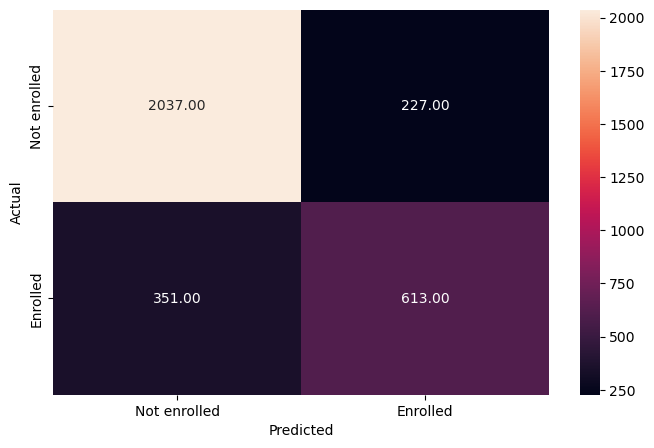

In [21]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       971
           1       0.75      0.63      0.69       413

    accuracy                           0.83      1384
   macro avg       0.80      0.77      0.78      1384
weighted avg       0.82      0.83      0.82      1384



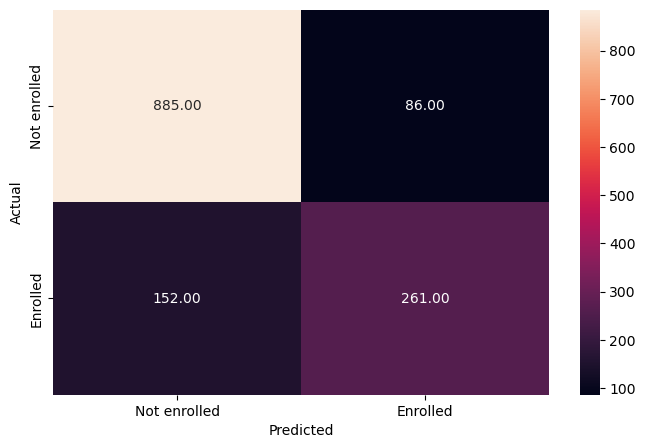

In [22]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

**Observations:**
- **We are getting an accuracy of around 82% and 83%** on train and test dataset for the class 1.
- The precision, recall and F1-score is comparable for both the test and the train data suggestive of no overfitting on the train data and proper generalization.
- However, **the recall for this model is only around 64% for class 1 on train and 63% on the test data.**
- As the recall is low, **this model will not perform well** in differentiating out the Leads most likely to enroll/convert.  
- As we can see from the Confusion Matrix, **this model fails to identify a significant proportion of Leads that will enroll (train - 613/964, test - 261/413) .**

**Let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition**

In [23]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)

,0
first_interaction_Website,1.300651
time_spent_on_website,0.864948
last_activity_Website Activity,0.248768
referral_Yes,0.201990
age,0.079082
educational_channels_Yes,0.042221
print_media_type2_Yes,0.032264
digital_media_Yes,0.025296
print_media_type1_Yes,0.024823
page_views_per_visit,-0.036623


The coefficients of the **logistic regression** model give us the **log of odds**, which is hard to interpret in the real world. We can convert the **log of odds into real odds** by taking its exponential.

In [24]:
# Finding the odds
odds = np.exp(lg.coef_[0]) 

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train_scaled.columns, columns = ['odds']).sort_values(by ='odds', ascending = False) 

,odds
first_interaction_Website,3.671688
time_spent_on_website,2.374883
last_activity_Website Activity,1.282445
referral_Yes,1.223836
age,1.082293
educational_channels_Yes,1.043125
print_media_type2_Yes,1.032791
digital_media_Yes,1.025618
print_media_type1_Yes,1.025134
page_views_per_visit,0.964040


**Observations:**
-  Based on the Logistic Regression model, Leads interacting first via company's webiste is the most important factor for conversion followed by time spent on the website, last interaction between the lead and ExtraaLearn is via webiste and so on as seen in the table above.
- Leads who interacted with ExtraaLearn first via their website have 3.6 times the odds of enrollment compared to those who do not use initernet
- The time spent on the website increase the odds of conversion by 1.37 (2.37-1) times. The more the time the higher the chances.
- Leads whose last activity was interacting with ExtraaLearn rep via webiste have 28% ((1.28-1)*100), more chances of conversion compared to their counterparts who do not use the internet.
- Leads who are directly referred are 22% more likely to convert as conpared to others.
- Age, hearing about ExtraaLearn via educational channel, seeing ExtraaLearning Ads via the magazines, seens Ads via digital magazines and then seeing the Ads in the Newspaper increase the odds of conversion by 8%, 4%, 3%, 3%, 3% and 3% respectively.
- While the increasing average number of pages viewed/visit, increasing number of times of webiste visits, Leads who are unemployed or students, interacted last with ExtraaLearn rep via phone, low and medium profile completion reduce the odds of Lead conversion.

### **Decision Tree**

* I will explore the model building first using **DecisionTreeClassifier function.** 
* If the frequency of class A is 30% and the frequency of class B is 70%, then class B will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.30, 1:0.70} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [25]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

In [26]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



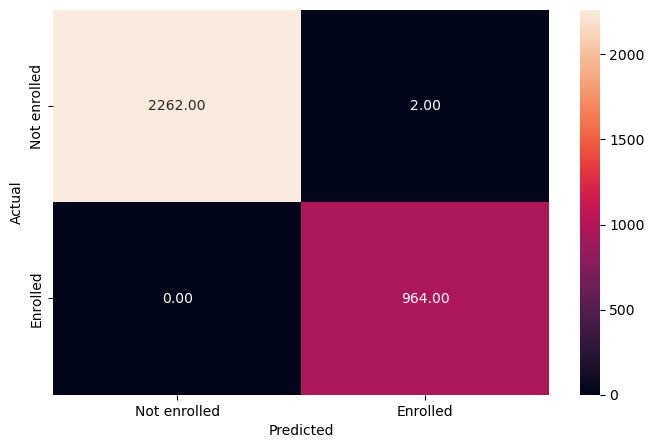

In [27]:
# Checking performance on the training dataset with the decision tree model
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.66      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.75      1384
weighted avg       0.79      0.79      0.79      1384



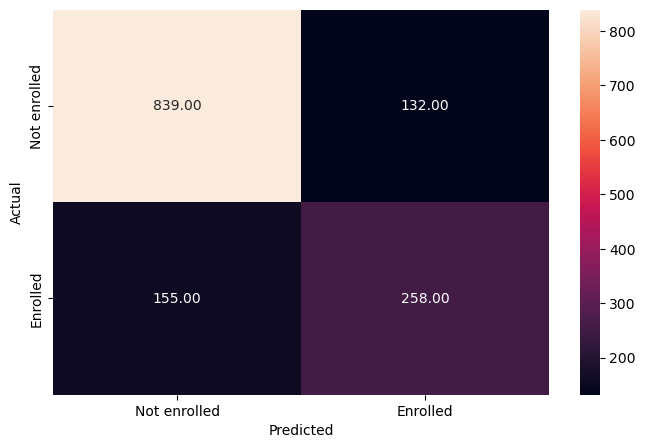

In [28]:
# Checking performance on the test dataset with the decision tree model
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

- The Decision Tree fits the traning data perfectly **(Precision, Recall and accuracy - 100%)** but performs poorly **(Precision, Recall and Accuracy are 66%, 62%, and 79% respectively)** on the test data. This is suggestive of overfitting on the training data and poor generalization on the test data.
- The precision of 34% (1 - 0.66) on the test data suggests there is a 34% chances that the model will predict a Lead conversion/enrollment for the program when they did not and only 38% chances of prediciting a lead conversion when they did.**This will be very misleading for ExtraaLearn and will affect their planning.**
- Due to these shortfalls of the model, **I will prune the decision tree using the Max depth hyperparameter to reduce overfitting**

**Let's plot the feature importance and check the most important features based on the Decision tree model.**

<AxesSubplot:xlabel='Importance'>

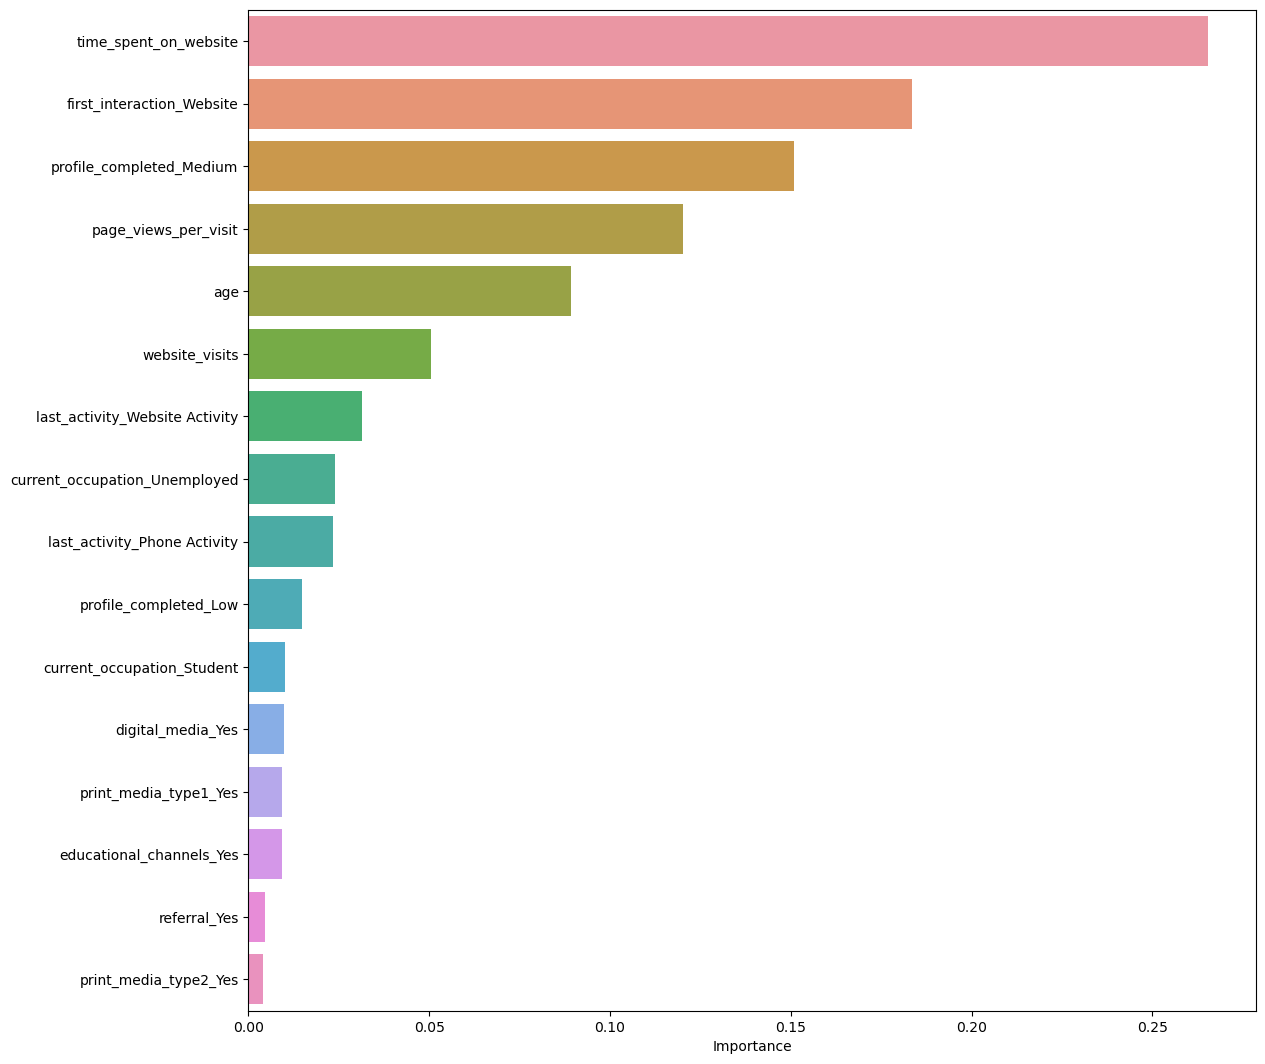

In [29]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

**Observation:**

- According to the current decision tree, **Time spent on website followed by if the first interaction is the website, profile completion is medium, pages viewed per visit, age and website visits** are most important drivers for Lead conversion.
- This might suggest that leads likely to convert are those who explore ExtraaLearn webiste more, started the completion of their profile and relatively of older age.
- Also if leads are unemployed and also contacted ExtraaLearn via phone calls, they might convert.
- Although the univariate analysis, the average website visits, pages viwed per visit and age does not seem to differ among the different status group but are significant in the Decision Tree algorithm
- Also those with medium profile completions seem to have higher chances of conversion as opposed to the the observation from the univariate analysis. This is another reason while we should improve our model via prunning to validate its prediction.

## Do we need to prune the tree?

**Yes we need to prune the tree because the model fits perfecty on the train data (100%) indicating overfitting but performs badly on the test data with a recall of 62% and precision of 66 percent. This also suggest the model has no external validation/generalizability**

In [44]:
# Building decision tree model with max depth of 4
dt_1 = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, max_depth=4, random_state = 1)

In [45]:
# Fitting decision tree model
dt_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=4,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      2264
           1       0.66      0.89      0.76       964

    accuracy                           0.83      3228
   macro avg       0.80      0.85      0.82      3228
weighted avg       0.86      0.83      0.84      3228



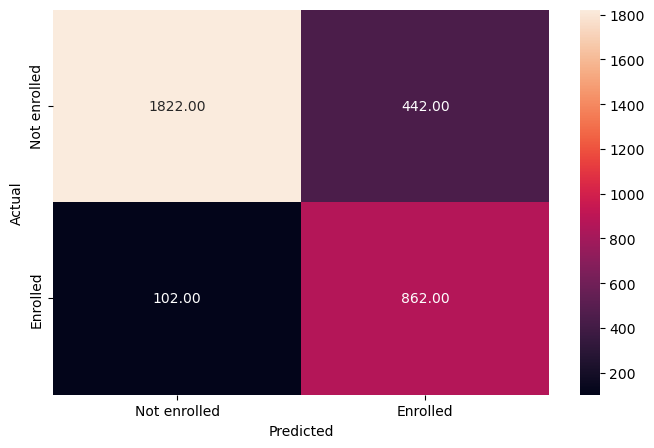

In [46]:
# Checking performance on the training dataset
y_train_pred_dt_1 = dt_1.predict(X_train)

metrics_score(y_train, y_train_pred_dt_1)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       971
           1       0.64      0.87      0.74       413

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.85      0.82      0.82      1384



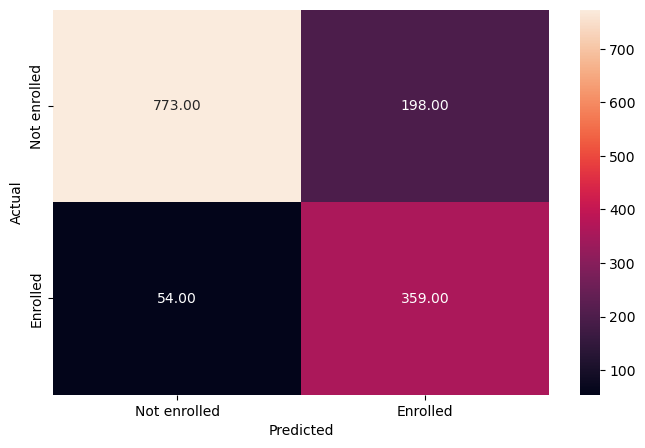

In [47]:
# Checking performance on the test dataset
y_test_pred_dt_1 = dt_1.predict(X_test)

metrics_score(y_test, y_test_pred_dt_1)

**Observation:**

- After changing the max depth to 4(prunning the model) we see that recall and precision on both train and test data is camparable (no huge discrepancy) suggesting that the model is generalizing well with high recall as compared to the unpruned Decision tree model.
- Also on the train data, the parameters are not 100% meaning it is not overfitting.

<AxesSubplot:xlabel='Importance'>

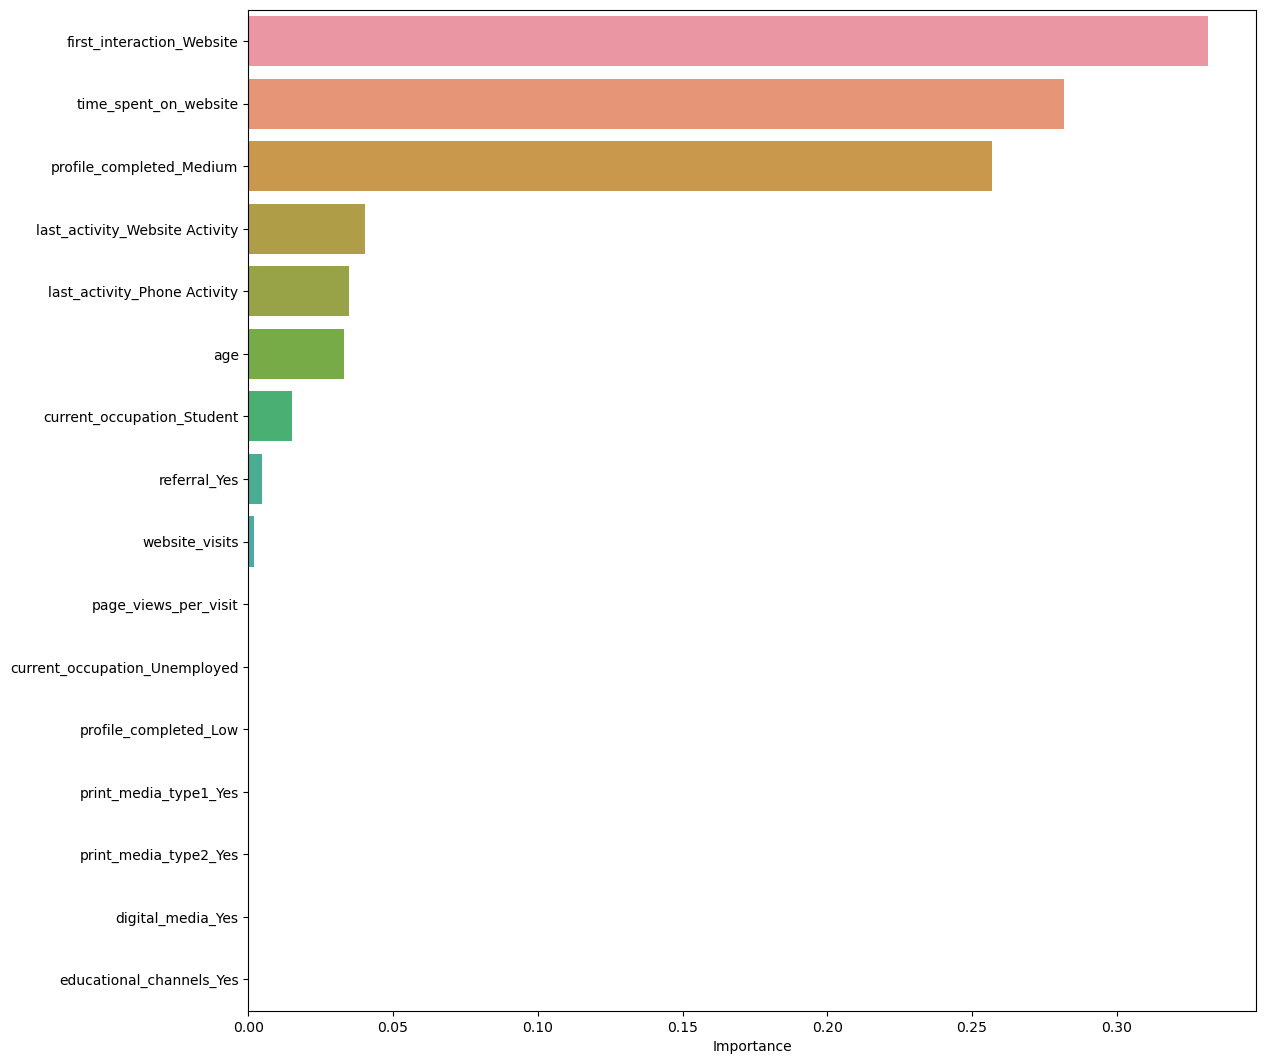

In [48]:
# Plot the feature importance after prunning

importances_1 = dt_1.feature_importances_

columns = X.columns

importance_df_1 = pd.DataFrame(importances_1, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df_1.Importance,importance_df_1.index)

**Observation:**

- After prunning the number of feature of importance has reduced to just 9 from 16 in the unprunned model with the most important being lead having their first interaction with the website followed by the time spent on the webiste, medium profile completion, last communication with ExtraaLearn is via the website and then phone.

**Let's plot the tree** and check:

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to **max_depth = 4**.

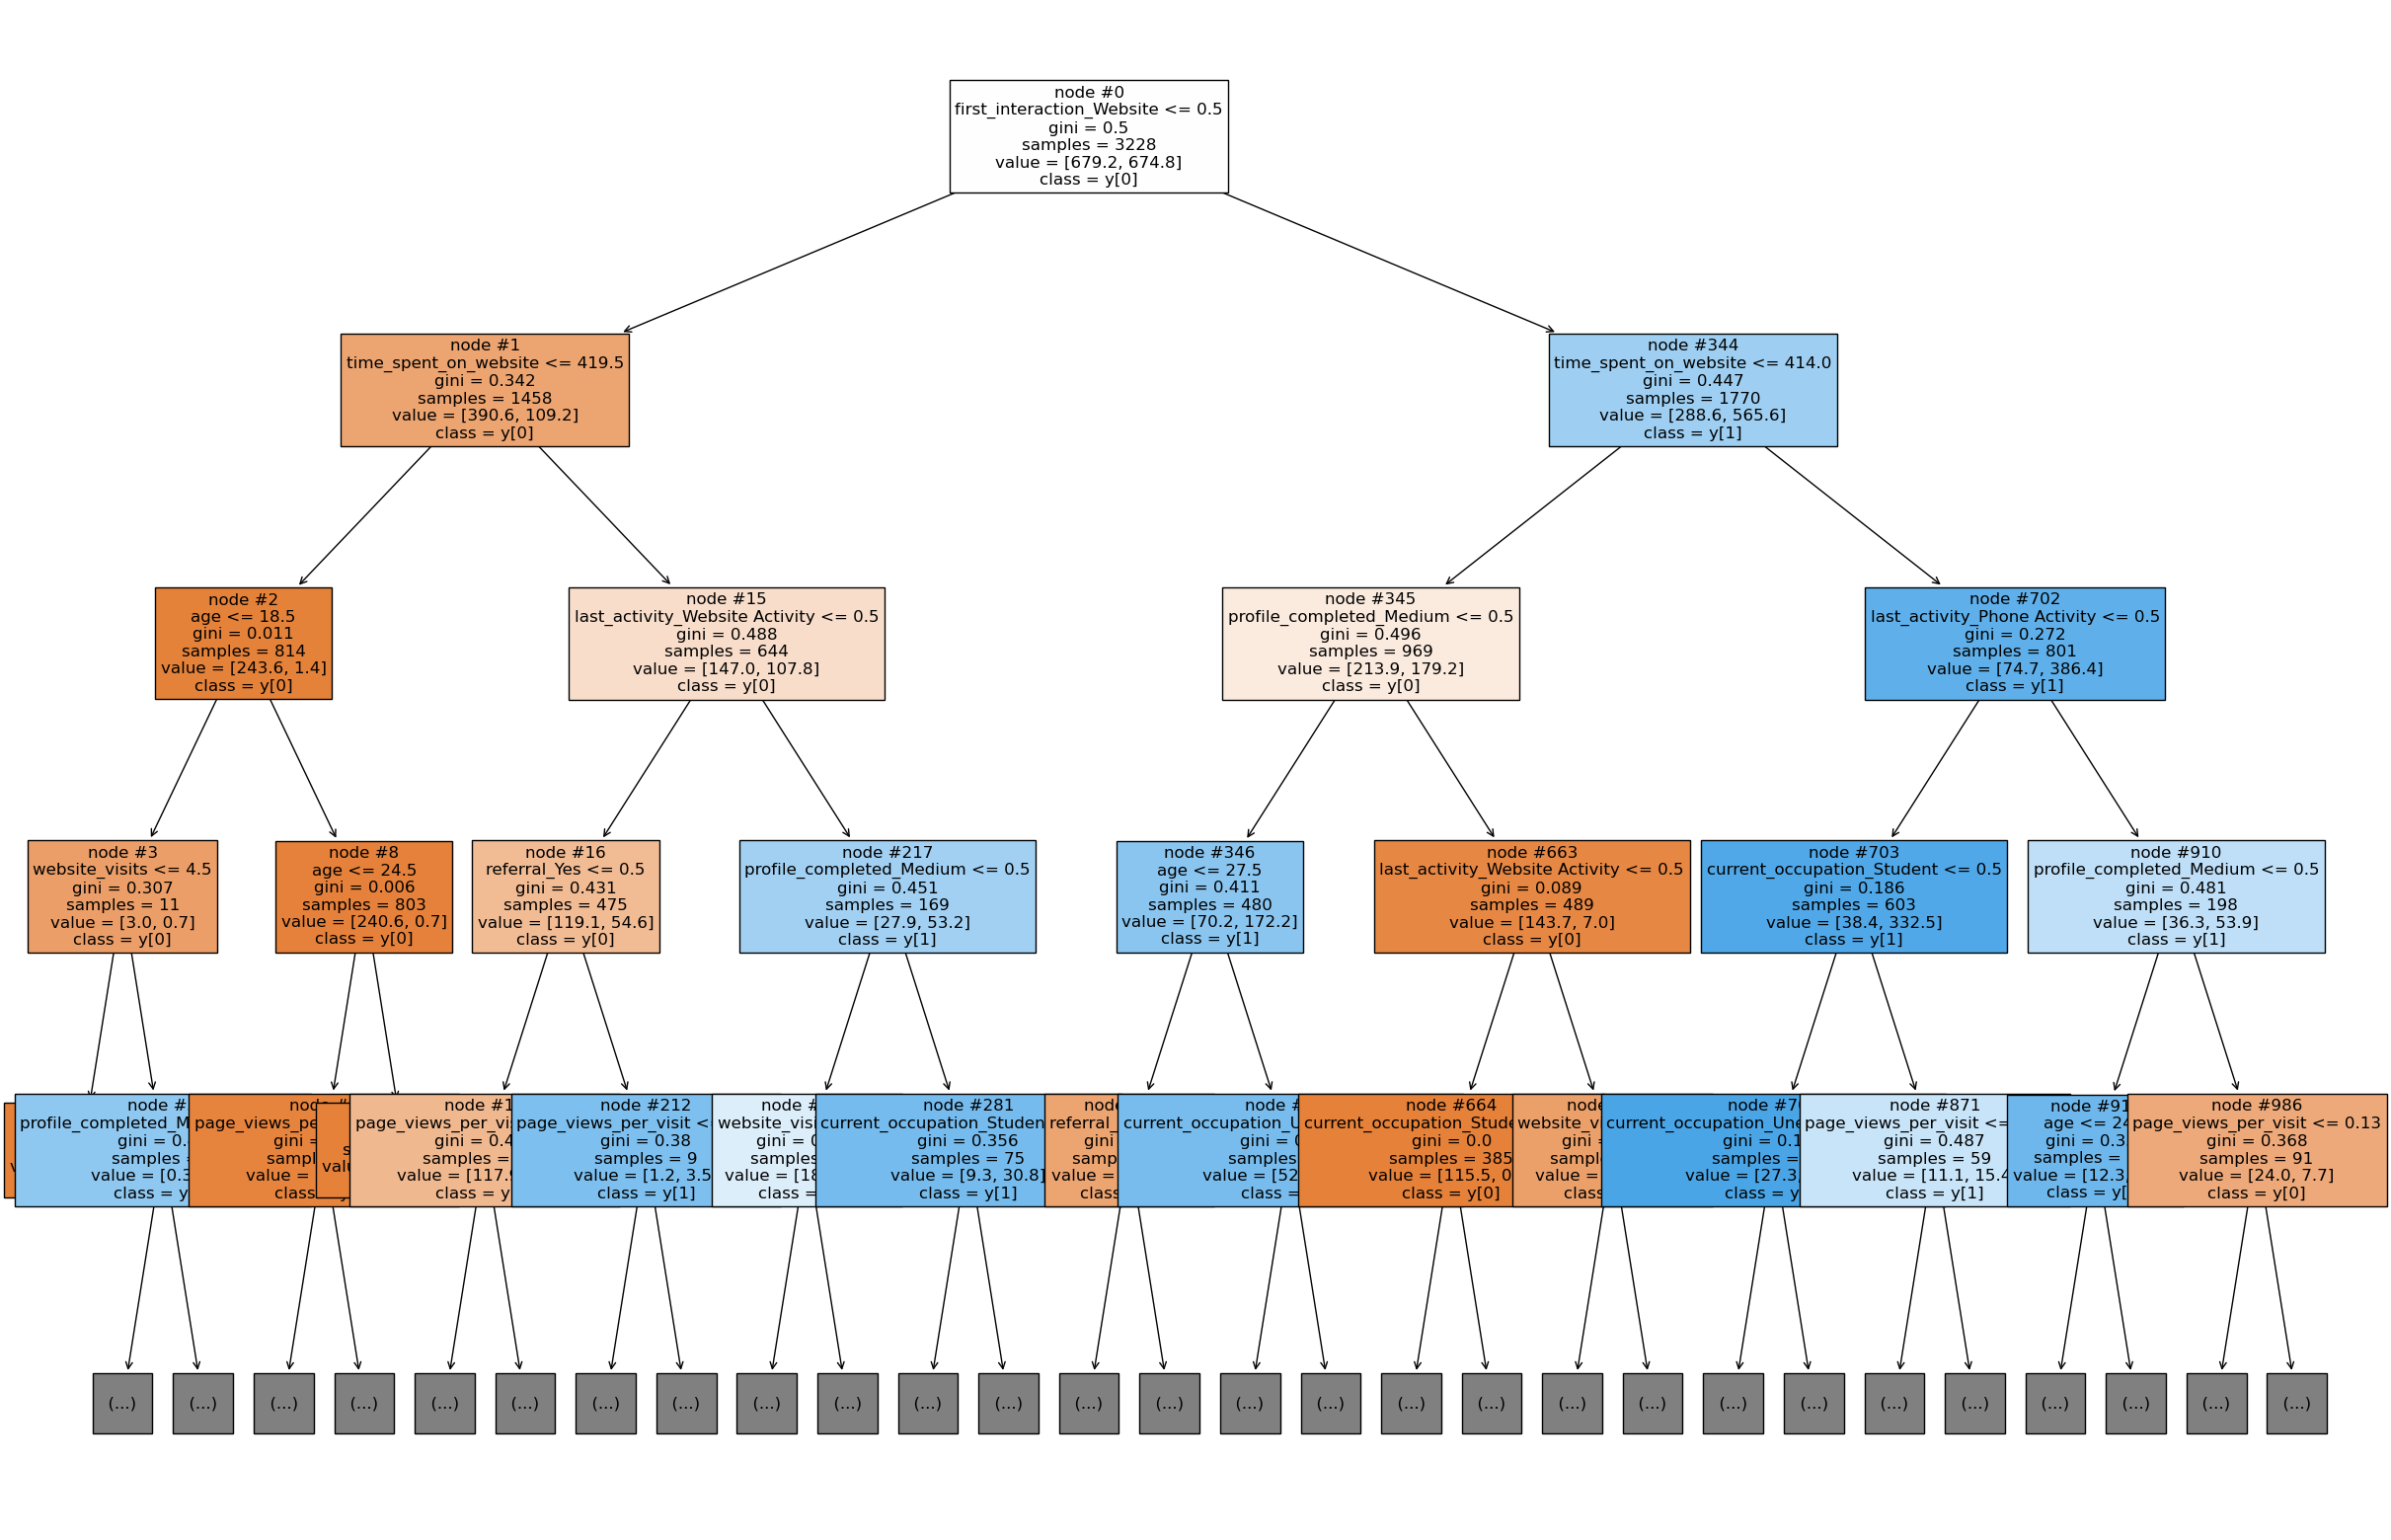

In [35]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

## Building a Random Forest model

In [36]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



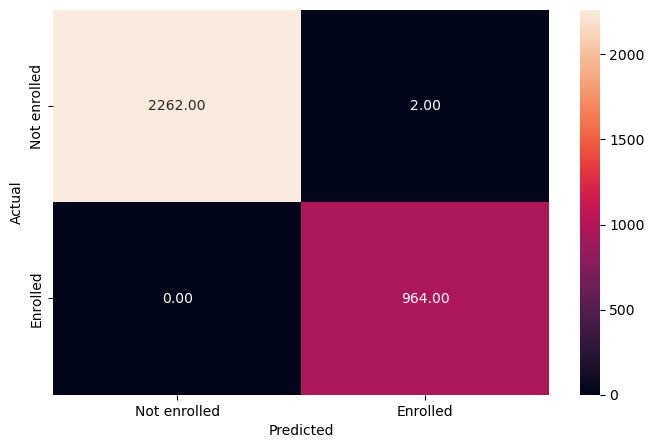

In [37]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

- All metrics in the Random Forest is 100% suggesting an overfit on the training data.

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       971
           1       0.81      0.72      0.76       413

    accuracy                           0.87      1384
   macro avg       0.85      0.82      0.83      1384
weighted avg       0.86      0.87      0.86      1384



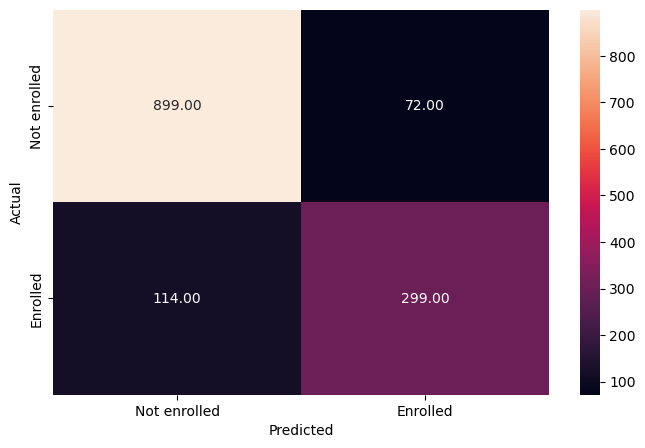

In [38]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

-  The recall on the test data is 72% and a precision of 81% which is suggestive of a relatively good performance on the test data. 
- We need to improve on the recall so that ExtraaLearn do not miss out on 29% of Leads that would have enrolled for the program.


## Do we need to prune the tree?

***We will prune the model and see the performance as compared to the default Random forest to make this conclusion ***

In [39]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [40]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, min_samples_leaf=3,
                       n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2264
           1       0.84      0.94      0.89       964

    accuracy                           0.93      3228
   macro avg       0.91      0.93      0.92      3228
weighted avg       0.94      0.93      0.93      3228



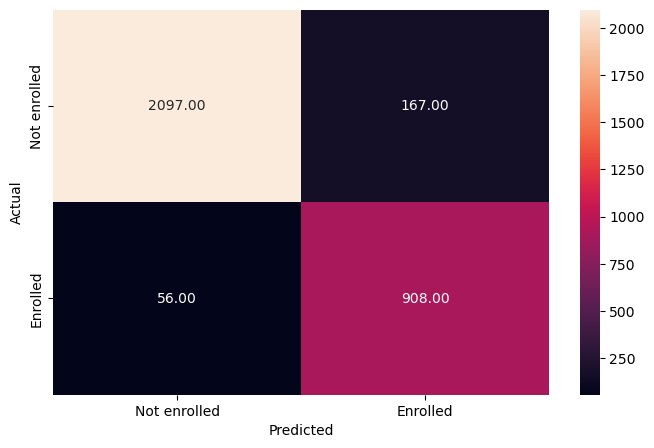

In [41]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       971
           1       0.74      0.79      0.76       413

    accuracy                           0.85      1384
   macro avg       0.82      0.84      0.83      1384
weighted avg       0.86      0.85      0.86      1384



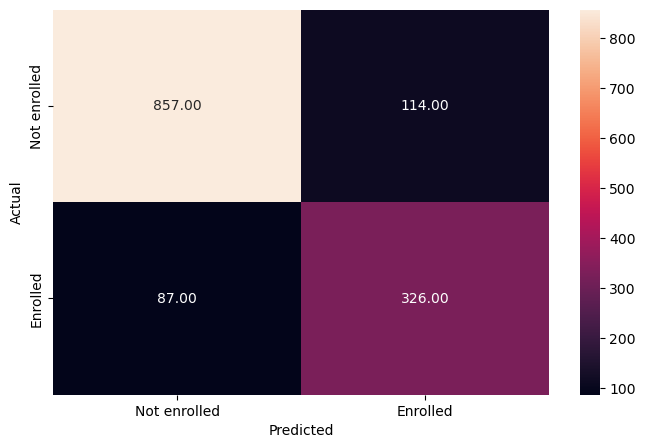

In [42]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**

- The pruned model seems to perform better than the default Random Forest model as it improves the recall on the test data and does not overfit on the training data.
- Although the precision on the test data drops to 74% from the 81% in the default the most important question for ExtraaLearn is to predict how many leads who converted the model able to predict will convert (% of TP/Recall).


<AxesSubplot:xlabel='Importance'>

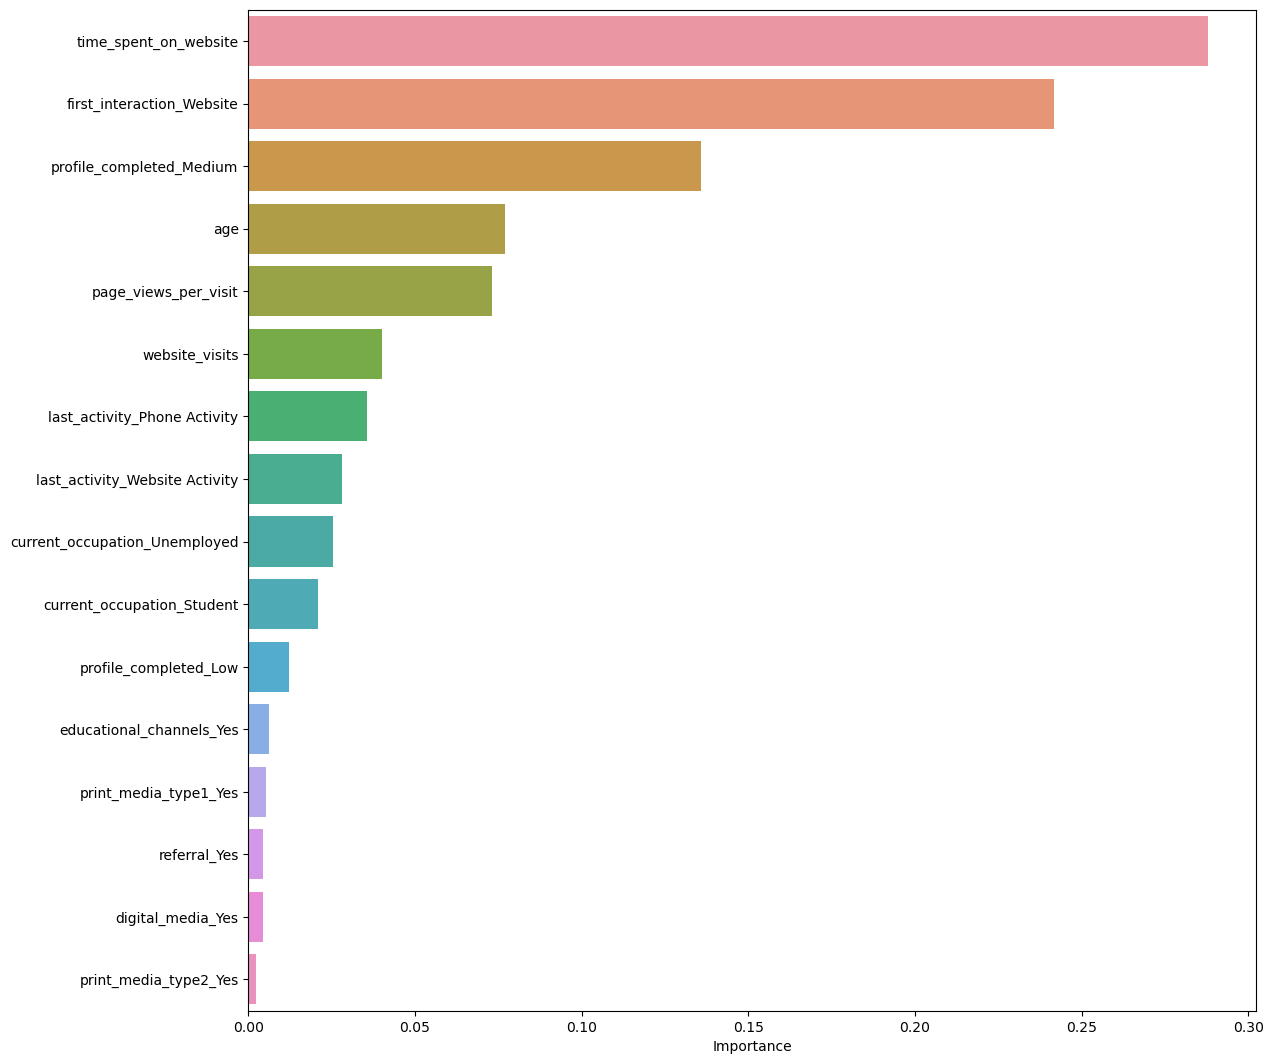

In [43]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**

- The pruned Random Forest data identified time spent on the website followed by the first interaction with ExtraaLearn is via the website and completed profile being medium followed by pages viewed per visit and so on as seen on the diagram above.

## Actionable Insights and Recommendations

**Actionable Insights:**

- According to our selected models, Leads whose first interaction with ExtraaLearn is via the website are more likely to be converted probably because they initiate the search for the Program and that motivation would most likely make them enrol.
- This is Followed by Time spent on the Website, and those who have a medium profile completion and communicated with ExtraaLearn via the website and then followed up with a phone call most probably to get further information to enrol for the program.
- Also, there are common factors identified by all the models as important for the conversion of the leads. First interaction via the website, time spent on the website, age, and last interaction with ExtraaLearn is via the website. These factors should be prioritized in planning by the ExtraaLearn project team.
- Those who converted seem to be higher with direct referrals in the cross-tabulation analysis but seem to be lower on the importance chart from all models.
- The current occupation seems to vary in importance across different models. The feature needs to be explored further.
- All the pruned model for both the Decision tree and the Random Forest performs better on the test data and does not overfit the train data. So, pruning the model improved the performance.
- However, the recall of the pruned decision tree on the test data is higher (87%) than that of the Random Forest (79%). Although the reverse is the case for the precision of both models (64% for the pruned Decision Tree and 74% for the pruned Random Forest), we will go with the model with the highest recall which is the pruned Decision tree.
	
**Recommendations:**

- ExtraLearn should channel their follow-up resources mostly towards Leads who optimised their website more to know and enquire about the program.
- Among those exploring their website, the priority should be placed on the older leads and those who have at least 50% profile completion.